In [1]:
!pip install seaborn pyarrow seaborn lightgbm scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import polars as pl
import seaborn as sns

In [3]:
df = pl.read_csv('titanic.csv')
df

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
i64,i64,str,str,f64,i64,i64,str,f64,str,str,str,i64,str
1,1,"""Allen, Miss. Elisabeth Walton""","""female""",29.0,0,0,"""24160""",211.3375,"""B5""","""S""","""2""",null,"""St Louis, MO"""
1,1,"""Allison, Master. Hudson Trevor""","""male""",0.92,1,2,"""113781""",151.55,"""C22 C26""","""S""","""11""",null,"""Montreal, PQ / Chesterville, O…"
1,0,"""Allison, Miss. Helen Loraine""","""female""",2.0,1,2,"""113781""",151.55,"""C22 C26""","""S""",null,null,"""Montreal, PQ / Chesterville, O…"
1,0,"""Allison, Mr. Hudson Joshua Cre…","""male""",30.0,1,2,"""113781""",151.55,"""C22 C26""","""S""",null,135,"""Montreal, PQ / Chesterville, O…"
1,0,"""Allison, Mrs. Hudson J C (Bess…","""female""",25.0,1,2,"""113781""",151.55,"""C22 C26""","""S""",null,null,"""Montreal, PQ / Chesterville, O…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…
3,0,"""Zabour, Miss. Hileni""","""female""",14.5,1,0,"""2665""",14.4542,null,"""C""",null,328,null
3,0,"""Zabour, Miss. Thamine""","""female""",null,1,0,"""2665""",14.4542,null,"""C""",null,null,null
3,0,"""Zakarian, Mr. Mapriededer""","""male""",26.5,0,0,"""2656""",7.225,null,"""C""",null,304,null


In [4]:
df.shape

(1309, 14)

In [5]:
df.describe()

statistic,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
str,f64,f64,str,str,f64,f64,f64,str,f64,str,str,str,f64,str
"""count""",1309.0,1309.0,"""1309""","""1309""",1046.0,1309.0,1309.0,"""1309""",1308.0,"""295""","""1307""","""486""",121.0,"""745"""
"""null_count""",0.0,0.0,"""0""","""0""",263.0,0.0,0.0,"""0""",1.0,"""1014""","""2""","""823""",1188.0,"""564"""
"""mean""",2.294882,0.381971,null,null,29.881138,0.498854,0.385027,null,33.295479,null,null,null,160.809917,null
"""std""",0.837836,0.486055,null,null,14.413493,1.041658,0.86556,null,51.758668,null,null,null,97.696922,null
"""min""",1.0,0.0,"""Abbing, Mr. Anthony""","""female""",0.17,0.0,0.0,"""110152""",0.0,"""A10""","""C""","""1""",1.0,"""?Havana, Cuba"""
"""25%""",2.0,0.0,null,null,21.0,0.0,0.0,null,7.8958,null,null,null,72.0,null
"""50%""",3.0,0.0,null,null,28.0,0.0,0.0,null,14.4542,null,null,null,155.0,null
"""75%""",3.0,1.0,null,null,39.0,1.0,0.0,null,31.275,null,null,null,256.0,null
"""max""",3.0,1.0,"""van Melkebeke, Mr. Philemon""","""male""",80.0,8.0,9.0,"""WE/P 5735""",512.3292,"""T""","""S""","""D""",328.0,"""Zurich, Switzerland"""


In [6]:
df.select(pl.col('survived')).unique()

survived
i64
0
1


In [7]:
(
    df.select(pl.col('survived'))
    .to_series()
    .value_counts(sort=True)
    .with_columns(
        (pl.col('count') / df.height).alias('ratio')
    )
)

survived,count,ratio
i64,u32,f64
0,809,0.618029
1,500,0.381971


In [8]:
use_col = ['survived', 'age', 'fare', 'pclass', 'sibsp', 'parch']
numeric_corr = df.select(use_col).drop_nulls().corr()
numeric_corr

survived,age,fare,pclass,sibsp,parch
f64,f64,f64,f64,f64,f64
1.0,-0.053957,0.249164,-0.319979,-0.012657,0.114091
-0.053957,1.0,0.17874,-0.411086,-0.243139,-0.150241
0.249164,0.17874,1.0,-0.565255,0.141184,0.216723
-0.319979,-0.411086,-0.565255,1.0,0.047746,0.017685
-0.012657,-0.243139,0.141184,0.047746,1.0,0.374291
0.114091,-0.150241,0.216723,0.017685,0.374291,1.0


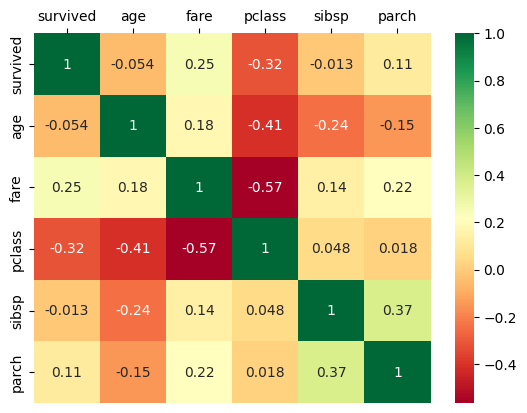

In [9]:
ax = sns.heatmap(
    numeric_corr,
    annot=True,
    cmap='RdYlGn',
    xticklabels=use_col,
    yticklabels=use_col
)
ax.xaxis.tick_top()

<Axes: xlabel='sex', ylabel='count'>

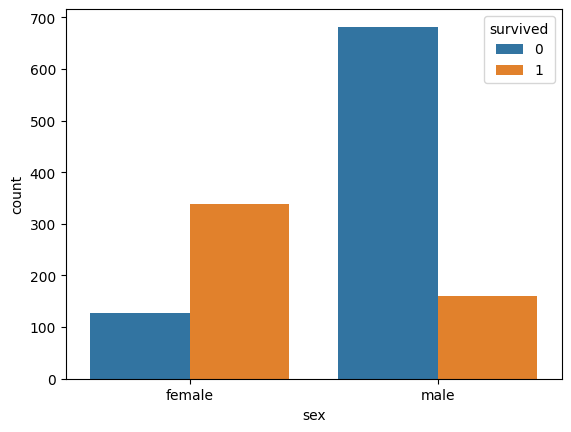

In [10]:
sns.countplot(
    data=df.to_pandas(),
    x='sex',
    hue='survived'
)

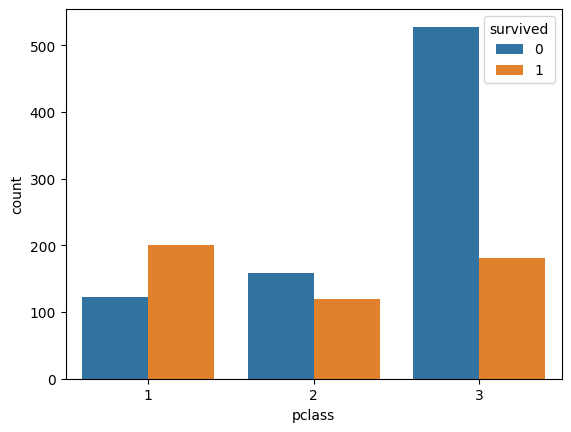

In [11]:
sns.countplot(
    data=df.to_pandas(),
    x='pclass',
    hue='survived'
);

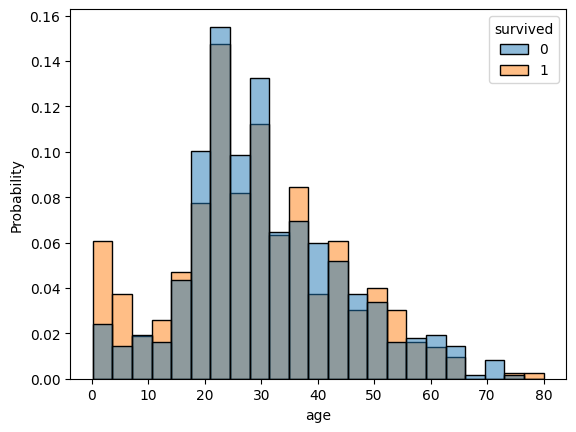

In [12]:
sns.histplot(
    data=df.to_pandas(),
    x='age',
    hue='survived',
    stat='probability',
    common_norm=False
);

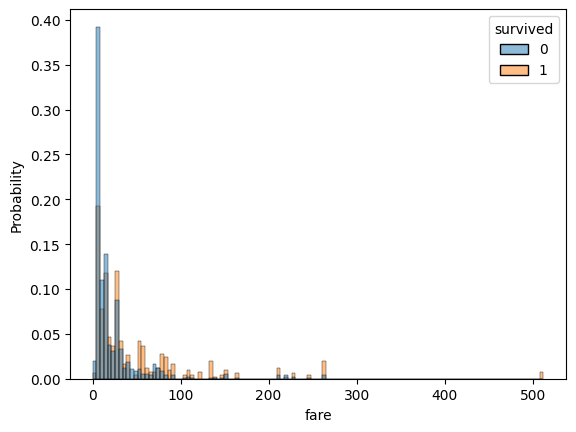

In [13]:
sns.histplot(
    data=df.to_pandas(),
    x='fare',
    hue='survived',
    stat='probability',
    common_norm=False
);

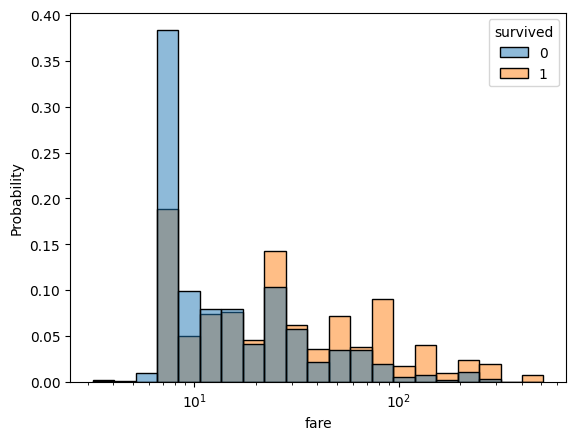

In [14]:
sns.histplot(
    data=df.to_pandas(),
    x='fare',
    hue='survived',
    stat='probability',
    common_norm=False,
    log_scale=True
);

In [15]:
def binning(column: pl.Expr, bins: int) -> pl.Expr:
    expr = (
        column
        .qcut(
            quantiles=[q / bins for q in range(1, bins)],
            labels=[str(i) for i in range(bins)]
        )
    )
    return expr

In [16]:
lf = pl.scan_csv('titanic.csv')
lf

In [17]:
lf = (
    lf
    .with_columns(
        pl.sum_horizontal(
            pl.all()
            .exclude(['boat', 'body', 'survived'])
            .is_null() 
        ).alias('null_count'),
        
        binning(pl.col('age'), 6).alias('age_bin'),

        pl.col('name')
        .str.extract('Mr\.|Mrs\.|Ms\.|Master\.|Miss\.|Dr\.', 0)
        .alias('honorifics'),

        pl.col('cabin')
        .str.extract('[A-Za-z]', 0)
        .alias('cabin_alphabet'),

        pl.col('cabin')
        .str.extract_all('\d+')
        .cast(pl.List(pl.Int32))
        .list.mean()
        .alias('cabin_number_mean'),
    )
    .with_columns(
        (pl.col('sibsp') + pl.col('parch')).alias('family_size'),

        pl.col('name')
        .str.len_chars()
        .alias('name_len'),

        pl.col('cabin')
        .fill_null('')
        .str.split(by=' ')
        .list.len()
        .alias('cabin_count'),

        pl.concat_str([pl.col('sex'), pl.col('age_bin')], separator='_').alias('sex_age'),

        pl.concat_str([pl.col('pclass'), pl.col('age_bin')], separator='_').alias('pclass_age'),

        pl.concat_str([pl.col('honorifics'), pl.col('age_bin')], separator='_').alias('honorifics_age'),

        pl.col('age')
        .rank()
        .over('honorifics')
        .alias('age_rank_over_honorifics'),

        pl.col('cabin_number_mean')
        .rank()
        .over('cabin_alphabet')
        .alias('cabin_number_mean_rank_over_cabin_alphabet')
    )
)

In [18]:
pl.Config.set_tbl_cols(30)

polars.config.Config

In [19]:
df = lf.collect(streaming=True)

In [20]:
!apt update
!apt install libgomp1

Hit:1 http://deb.debian.org/debian bookworm InRelease
Get:2 http://deb.debian.org/debian bookworm-updates InRelease [55.4 kB]
Hit:3 http://deb.debian.org/debian-security bookworm-security InRelease
Fetched 55.4 kB in 1s (58.3 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
All packages are up to date.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgomp1 is already the newest version (12.2.0-14).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [21]:
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np
import lightgbm as lgb

In [22]:
use_col = [
    "pclass",
    "age",
    "sibsp",
    "parch",
    "ticket",
    "fare",
    "embarked",
    "home.dest",
    "null_count",
    "age_bin",
    "honorifics",
    "cabin_alphabet",
    "cabin_number_mean",
    "family_size",
    "name_len",
    "cabin_count",
    "sex_age",
    "pclass_age",
    "honorifics_age",
    "age_rank_over_honorifics",
    "cabin_number_mean_rank_over_cabin_alphabet",
]

CATEGORICAL_FEATURE = [
    "ticket",
    "embarked",
    "home.dest",
    "honorifics",
    "cabin_alphabet",
    "honorifics_age",
    "sex_age",
    "pclass_age",
]

TARGET_COL = "survived"
N_FOLD = 3
SEED = 42

In [23]:
# 学習データとテストデータに分割する
train, test = train_test_split(
    df,
    test_size=0.2,
    random_state=SEED,
    shuffle=True,
    stratify=df.get_column(TARGET_COL)
)

In [24]:
# foldの作成
fold_arr = np.zeros(train.height)
fold = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

for idx, (_, val_idx) in enumerate(fold.split(train, train.get_column(TARGET_COL))):
    fold_arr[val_idx] = idx

train = train.with_columns(
    pl.Series(fold_arr).cast(pl.Int64).alias("fold")
)

In [25]:
TARGET_ENCODING_COL = [
    "honorifics",
    "cabin_alphabet",
    "sex_age",
    "home.dest",
    "honorifics_age",
    "pclass_age",
]

# ① Target Encoding対象列ごとに処理する
for col in TARGET_ENCODING_COL:
    target_encoding_col_name = f"target_encoding_{col}"

    train = train.with_columns(pl.lit(0).alias(target_encoding_col_name))
    use_col.append(target_encoding_col_name)

    # ② Target Encoding対象列ごとに処理する
    for fold in range(N_FOLD):

        # ③ Target Encodingの値計算
        valid_fold = train.filter(pl.col("fold") == fold)

        target_encoding_dict = (
            valid_fold.select(
                pl.col(col),
                pl.col(TARGET_COL).mean().over(col).alias(f"{TARGET_COL}_average"),
            )
            .unique()
            .to_dicts()
        )

        target_encoding_dict = {
            item[col]: item[f"{TARGET_COL}_average"] for item in target_encoding_dict
        }

        # ④ Target Encodingの値格納
        train = train.with_columns(
            pl.when(pl.col("fold") != fold)
            .then(pl.col(col).replace_strict(target_encoding_dict, default=-1))
            .otherwise(pl.col(target_encoding_col_name))
            .alias(target_encoding_col_name)
        )

    # ⑤ テストデータのTargetEncoding
    test_target_encoding_dict = (
        train.select(
            pl.col(col),
            pl.col(TARGET_COL).mean().over(col).alias(f"{TARGET_COL}_average"),
        )
        .unique()
        .to_dicts()
    )

    test_target_encoding_dict = {
        item[col]: item[f"{TARGET_COL}_average"] for item in test_target_encoding_dict
    }

    test = test.with_columns(
        pl.col(col).replace_strict(test_target_encoding_dict, default=-1.0)
        .alias(target_encoding_col_name)
    )

In [26]:
train.columns

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest',
 'null_count',
 'age_bin',
 'honorifics',
 'cabin_alphabet',
 'cabin_number_mean',
 'family_size',
 'name_len',
 'cabin_count',
 'sex_age',
 'pclass_age',
 'honorifics_age',
 'age_rank_over_honorifics',
 'cabin_number_mean_rank_over_cabin_alphabet',
 'fold',
 'target_encoding_honorifics',
 'target_encoding_cabin_alphabet',
 'target_encoding_sex_age',
 'target_encoding_home.dest',
 'target_encoding_honorifics_age',
 'target_encoding_pclass_age']